# KNN based classifier to classify given set of features in Mushroom Database

In [38]:
import numpy as np
import pandas as pd
from numpy.random import RandomState
from collections import Counter
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [39]:
def accuracy(y_real, y_pred):
#    print("y_real ",len(y_real))
#    print("y_pred ",len(y_pred))
    accuracy = np.sum(y_real == y_pred) / len(y_real)
    return accuracy

In [40]:
def euclidean_distance(row):
    #print(row.shape)
    dist = []
    for train_row in X_train:
        dist.append(np.sqrt(np.sum((train_row - row) ** 2)))
    return dist

In [41]:
def manhattan_distance(row):
    dist = []
    for train_row in X_train:
        dist.append(np.sum(np.abs(train_row - row)))
    return dist

In [42]:
def prediction(row,k):
    dist = euclidean_distance(row)
    indexes = np.argsort(dist)[:k]
    neighbors = Y_train[indexes]
    match = Counter(neighbors).most_common(1)
    #print(match[0][0])
    return match[0][0]

In [43]:
def prediction_manhattan(row,k):
    dist = manhattan_distance(row)
    indexes = np.argsort(dist)[:k]
    neighbors = Y_train[indexes]
    match = Counter(neighbors).most_common(1)
    #print(match[0][0])
    return match[0][0]

In [44]:
def predict(k):
    y_pred = [prediction(x,k) for x in X_validation]
    return np.array(y_pred)

In [45]:
def predict_euclidean(k):
    y_pred = [prediction(x,k) for x in X_test]
    return np.array(y_pred)

In [46]:
def predict_manhattan(k):
    y_pred = [prediction_manhattan(x,k) for x in X_validation]
    return np.array(y_pred)

In [ ]:
missing_values = ["?"]
temp_df = pd.read_csv('/media/indranil/New Volume/second sem/SMAI/Assignment 1/q2/dataset/train.csv', na_values = missing_values, header = None)
new_temp_df = temp_df.fillna(temp_df.iloc[:,11:12].mode().iloc[0])
new_temp_df.iloc[:,11:12]
new_ar = np.array(new_temp_df)
new_ar.shape
for x in range(0, new_ar.shape[0]):
    for y in range(0, new_ar.shape[1]):
        new_ar[x][y] = ord(new_ar[x][y])
new_ar[:,0]

In [48]:
missing_values = ["?"]
temp_df = pd.read_csv('/media/indranil/New Volume1/second sem/SMAI/Assignment 1/q2/dataset/train.csv', na_values = missing_values, header = None)
df = temp_df.fillna(temp_df.iloc[:,11:12].mode().iloc[0])
rng = RandomState()
temp_train = df.sample(frac=0.8,random_state = rng)
temp_validation = df.loc[~df.index.isin(temp_train.index)]
train = np.array(temp_train)
validation = np.array(temp_validation)
for x in range(0, train.shape[0]):
    for y in range(0, train.shape[1]):
        train[x][y] = float(ord(train[x][y]))
for x in range(0, validation.shape[0]):
    for y in range(0, validation.shape[1]):
        validation[x][y] = float(ord(validation[x][y]))
X_train,Y_train = train[:,1:], train[:,0]
X_validation,Y_validation = validation[:, 1:], validation[:,0]
#X_train = np.array(X_train)
#Y_train = np.array(Y_train)
#X_validation = np.array(X_validation)
#Y_validation = np.array(Y_validation)
#X_train.shape

# Prediction on test data set with K =2 on euclidean distance classifier.

In [25]:
df_test = pd.read_csv('/media/indranil/New Volume1/second sem/SMAI/Assignment 1/q2/dataset/test.csv',header = None)
#print(df_test.shape)
X_test = df_test.to_numpy()
for x in range(0, X_test.shape[0]):
    for y in range(0, X_test.shape[1]):
        X_test[x][y] = float(ord(X_test[x][y]))
#print(X_test)
Y_temp_test = pd.read_csv('/media/indranil/New Volume1/second sem/SMAI/Assignment 1/q2/dataset/test_labels.csv',header = None)
Y_test_np = Y_temp_test.to_numpy()
#Y_test.shape
Y_list = list()
for x in range(0, Y_test_np.shape[0]):
    for y in range(0, Y_test_np.shape[1]):
        #print(float(ord(Y_test_np[x][y])))
        Y_list.append(float(ord(Y_test_np[x][y])))
Y_test = np.array(Y_list)
predictions_k = predict_euclidean(2)
accuracy(Y_test, predictions_k)

0.999

# Confusion Matrix using k = 2

In [26]:
print(confusion_matrix(Y_test, predictions_k))

[[504   1]
 [  0 495]]


# Classification Report using k = 2

In [27]:
print(classification_report(Y_test, predictions_k))

              precision    recall  f1-score   support

       101.0       1.00      1.00      1.00       505
       112.0       1.00      1.00      1.00       495

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



# Classification using scikit-learn’s kNN classifier

In [29]:
knn_df_test = pd.read_csv('/media/indranil/New Volume1/second sem/SMAI/Assignment 1/q2/dataset/test.csv',header = None)
#print(df_test.shape)
X_test = knn_df_test.to_numpy()
for x in range(0, X_test.shape[0]):
    for y in range(0, X_test.shape[1]):
        X_test[x][y] = float(ord(X_test[x][y]))
#print(X_test)
knn_Y_temp_test = pd.read_csv('/media/indranil/New Volume1/second sem/SMAI/Assignment 1/q2/dataset/test_labels.csv',header = None)
knn_Y_test_np = knn_Y_temp_test.to_numpy()
#Y_test.shape
Y_list = list()
for x in range(0, knn_Y_test_np.shape[0]):
    for y in range(0, knn_Y_test_np.shape[1]):
        Y_list.append(int(ord((Y_test_np[x][y]))))
Y_test = np.array(Y_list)
Y_train = Y_train.astype('float')
classifier = KNeighborsClassifier(n_neighbors=2)
#type(Y_train)
classifier.fit(X_train, Y_train)
knn_pred = classifier.predict(X_test)
accuracy(Y_test,knn_pred)

1.0


# Confusion matrix with Sklearn knn classifier

In [30]:
print(confusion_matrix(Y_test, knn_pred))

[[505   0]
 [  0 495]]


# Classification report with sklearn KNN classifier

In [31]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

         101       1.00      1.00      1.00       505
         112       1.00      1.00      1.00       495

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



Accuracy using euclidean distance with k = 3

In [63]:
predictions_3 = predict(3)
accuracy(Y_validation, predictions_3)

1.0


Accuracy using euclidean distance with k = 2

In [64]:
predictions_2 = predict(2)
accuracy(Y_validation, predictions_2)

1.0


Accuracy using euclidean distance with k = 1

In [65]:
predictions_1 = predict(1)
accuracy(Y_validation, predictions_1)

1.0


Accuracy using euclidean distance with k = 4

In [66]:
predictions_4 = predict(4)
accuracy(Y_validation, predictions_4)

1.0


Accuracy using euclidean distance with k = 5

In [67]:
predictions_5 = predict(5)
accuracy(Y_validation, predictions_5)

1.0


Accuracy using manhattan distance with k = 1

In [78]:
man_predictions_1 = predict_manhattan(1)
accuracy(Y_validation, man_predictions_1)

1.0


Accuracy using manhattan distance with k = 2

In [79]:
man_predictions_2 = predict_manhattan(2)
accuracy(Y_validation, man_predictions_2)

1.0


Accuracy using manhattan distance with k = 3

In [70]:
man_predictions_3 = predict_manhattan(3)
accuracy(Y_validation, man_predictions_3)

1.0


Accuracy using manhattan distance with k = 4

In [71]:
man_predictions_4 = predict_manhattan(4)
accuracy(Y_validation, man_predictions_4)

1.0


Accuracy using manhattan distance with k = 5

In [72]:
man_predictions_5 = predict_manhattan(5)
accuracy(Y_validation, man_predictions_5)

1.0


# With the classifier setting k = 2 the accuracy is 0.999 on test data set using euclidean distant. with sklearn classifier the accuracy is 1.0 on test data.

# Plotting of graph using different K value for eulclidean distance measurement

Text(0, 0.5, 'Testing Accuracy')

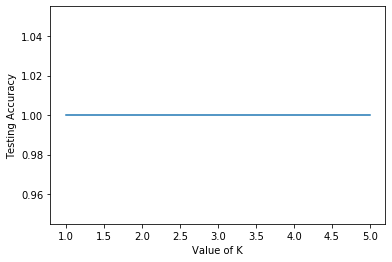

In [83]:
k = [1,2,3,4,5]
euc_list= [1.0,1.0,1.0,1.0,1.0]
plt.plot(k,euc_list)
plt.xlabel("Value of K")
plt.ylabel("Testing Accuracy")

# Plotting of graph using different K value for manhattan distance measurement

Text(0, 0.5, 'Testing Accuracy')

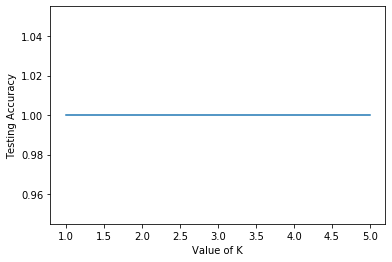

In [85]:
k = [1,2,3,4,5]
man_list= [1.0,1.0,1.0,1.0,1.0]
plt.plot(k,man_list)
plt.xlabel("Value of K")
plt.ylabel("Testing Accuracy")